(C:digital-images:histogram)=
# Histogram

## Definition

The histogram (French: _histogramme_) may be the simplest tool for image processing; it can be seen on cameras and even some smartphones, when shooting.
It depicts how the intensities of the pixels are distributed.
It is the discrete function $h$ such that

$$
h(i) = n_i
$$

where $n_i$ is the number of pixels with intensity $i$.

The code below shows an image and two associated histograms.
The histograms are displayed as a bar plot, constituted as a set of _bins_.
The number (hence the width) of the bins are chosen by the user;
in the example below, we choose 128 bins and 16 bins.
Both histograms lie on $[0,255]$ which are the intensity range of the image.

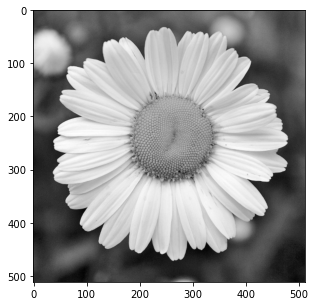

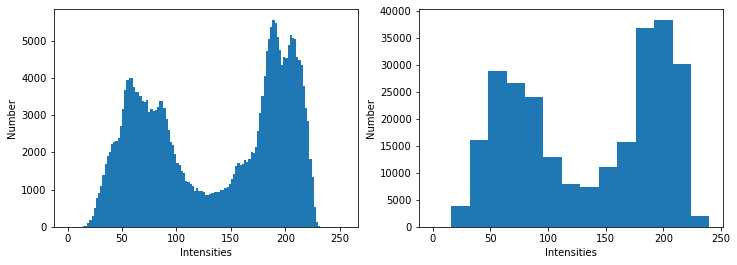

In [14]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

# Load the image
img = io.imread("../_static/figs/daisy.png", as_gray=True) * 255

# Display the image
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(img, cmap="gray")
plt.show()

# Prepare the figure for the histograms
fig, axs = plt.subplots(1, 2, figsize=(12,4))

# Plot the first histogram
axs[0].hist(
    img.ravel(),           # The image must be flattened to use function hist
    bins=range(0,256,2)    # Define 128 bins (of width 2) between 0 and 255
)
axs[0].set_xlabel("Intensities")
axs[0].set_ylabel("Number")

# Plot the second histogram
axs[1].hist(
    img.ravel(),           # The image must be flattened to use function hist
    bins=range(0,256,16)   # Define 16 bins (of width 16) between 0 and 255
)
axs[1].set_xlabel("Intensities")
axs[1].set_ylabel("Number")

# Show the figure
plt.show()

We distinguish two "modes" on the histogram.
The one on the left (intensities around 75) corresponds to the dark tones in the image (mainly the background).
The one on the right (intensities around 180) corresponds to the light tones (the petals and the center).

### Some remarks

* If the histogram $h$ is _normalized_ (_i.e._ the bins are divided by the pixel number $M \times N$),
  then it can be seen as a discrete probability density function $p$:

  $$
  p(i) = \frac{n_i}{M \times N}
  $$

* The histogram gives a global information about the pixel intensities of an image but loses the spatial information in the image.
  In consequence, two different images can have the same histogram (cf. {numref}`F:histogram:daisy-sorted`).
  
  ```{figure} daisy-sorted.svg
  ---
  name: F:histogram:daisy-sorted
  ---
  These two images have the same histogram.
  The image on the right actually corresponds to the pixels of the image on the left sorted with respect to their gray level.
  ```

(C:histogram-transformations)=
## Histogram transformations

A histogram transformation consists of applying a mathematical function to the intensity distribution.
Generally, the transformations are useful to improve the visual quality of an image,
but are rarely needed inside an automatic processing.

The transform, denoted $T$, is applied to the pixel intensities to change their values:

$$j = T(i)$$

where $j$ and $i$ are respectively the intensities of the new and the original image.
As a consequence, the histogram of the new image differs from the histogram of the original image.

Below are some common transformations (we assume the pixel intensities to lie in $[0,1]$).


### Negative image

$$T(i) = 1-i$$

```{figure} negative.svg
---
name: F:histogram:negative
---
Negative image: the gray levels are reversed.
```

### Gamma correction

$$T(i) = i^\gamma$$

```{figure} gamma.svg
---
name: F:histogram:gamma
---

Gamma correction modifies the coulors of an image acquired by an electronic system,
it is used to take into account the non-linear sensibility of human eyes to the light.
Here, $\gamma=0.4$
```


### Histogram spreading

(French: _étalement d'histogramme_)

$$T(i) = \frac{i-i_\text{min}}{i_\text{max}-i_\text{min}}$$

where $i_\text{min}$ and $i_\text{max}$ are respectively the minimum and maximum intensities in the image.

```{figure} spreading.svg
---
name: F:histogram:spread
---
Histogram spreading enhances the contrast by "dilating" the histogram to the whole intensity interval.
```

### Histogram equalization

(French: _égalisation d'histogramme_)

$$T(i) = \frac{1}{MN} \sum_{k=0}^i n_k$$

where $M$ and $N$ are the image size and $n_k$ is the number of pixels with intensity $k$.
This transformation aims to spread the histogram over the entire intensity range, and to make the histogram as flat as possible.
A consequence is an increase of the image contrast.
It is a fully automatic method that does not require any parameters to be set.
The demonstration of this equation is available in
[[Gonzalez 2010, section 3.3.1]](B:histogram:Gonzalez2010).

```{figure} equalization.svg
---
name: F:histogram:equalization
---
Histogram equalization is another contrast enhancing and tends to make the details more visible.
```

### Thresholding

The histogram is sometimes very useful to segment the image in two classes,
that is to distinguish the objects in the image with respect to their gray level.
Indeed, if the histogram shows clearly two modes (_i.e._ two "bumps"),
a threshold $T$ can be defined between these two modes, then apply a thresholding on the pixels, such that:
* if the pixel level is lower that $T$, then the pixel is in class 0 (displayed in black in {numref}`F:histogram:threshold`),
* otherwise, the pixel is in class 1 (displayed in white in {numref}`F:histogram:threshold`).

```{figure} thresholding.svg
---
name: F:histogram:threshold
---
Threshold with a threshold set to 0.45.
```

Such a thresholding yields a binary image whose pixels have only two values.
Several methods exist that compute the threshold automatically, such as [Otsu's method](segmentation:otsu).